# Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

Our goal will be to predict the price of a property using various features.

In [2]:
# !kaggle datasets download -d dansbecker/melbourne-housing-snapshot

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<Axes: >

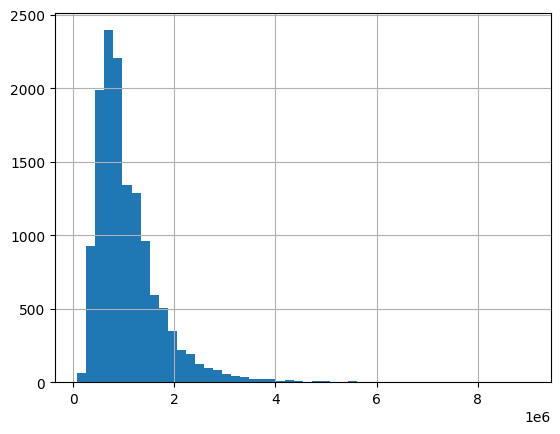

In [4]:
df['Price'].hist(bins=50)

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In order to simplify this problem, let's keep only a subset of the columns.

In [6]:
df = df[['Rooms','Price','Distance','Type','Lattitude','Longtitude','BuildingArea']]
df.head()

,Rooms,Price,Distance,Type,Lattitude,Longtitude,BuildingArea
0,2,1480000.0,2.5,h,-37.7996,144.9984,NaN
1,2,1035000.0,2.5,h,-37.8079,144.9934,79.0
2,3,1465000.0,2.5,h,-37.8093,144.9944,150.0
3,3,850000.0,2.5,h,-37.7969,144.9969,NaN
4,4,1600000.0,2.5,h,-37.8072,144.9941,142.0


# Basic cleaning

In [7]:
df.isna().sum()

Rooms              0
Price              0
Distance           0
Type               0
Lattitude          0
Longtitude         0
BuildingArea    6450
dtype: int64

In [8]:
df.loc[:,"BuildingArea"] = df["BuildingArea"].median()

In [9]:
df.isna().sum()

Rooms           0
Price           0
Distance        0
Type            0
Lattitude       0
Longtitude      0
BuildingArea    0
dtype: int64

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

In [11]:
one_hots = encoder.fit_transform(df[["Type"]])
encoder.categories_

/home/jean/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['h', 't', 'u'], dtype=object)]

In [23]:
cols = pd.DataFrame(one_hots, columns = ['h', 't', 'u'])
cols

,h,t,u
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13575,1.0,0.0,0.0
13576,1.0,0.0,0.0
13577,1.0,0.0,0.0
13578,1.0,0.0,0.0


In [24]:
df_prepared = df.join(cols).drop(["Type"], axis = 1)
df_prepared

,Rooms,Price,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
0,2,1480000.0,2.5,-37.79960,144.99840,126.0,1.0,0.0,0.0
1,2,1035000.0,2.5,-37.80790,144.99340,126.0,1.0,0.0,0.0
2,3,1465000.0,2.5,-37.80930,144.99440,126.0,1.0,0.0,0.0
3,3,850000.0,2.5,-37.79690,144.99690,126.0,1.0,0.0,0.0
4,4,1600000.0,2.5,-37.80720,144.99410,126.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,-37.90562,145.16761,126.0,1.0,0.0,0.0
13576,3,1031000.0,6.8,-37.85927,144.87904,126.0,1.0,0.0,0.0
13577,3,1170000.0,6.8,-37.85274,144.88738,126.0,1.0,0.0,0.0
13578,4,2500000.0,6.8,-37.85908,144.89299,126.0,1.0,0.0,0.0


# Data Split

In [25]:
df_prepared.shape

(13580, 9)

In [26]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

Basic split :

In [95]:
train_set, test_set = train_test_split(df_prepared, test_size=0.2)

In [96]:
X_train = train_set.drop(['Price'], axis = 1)
Y_train = train_set['Price']
X_test = train_set.drop(['Price'], axis = 1)
Y_test = train_set['Price']

In [97]:
X_train.head()

,Rooms,Distance,Lattitude,Longtitude,BuildingArea,h,t,u
10985,2,24.7,-37.99173,145.22309,126.0,1.0,0.0,0.0
6767,3,4.5,-37.76430,144.98080,126.0,0.0,1.0,0.0
7828,3,12.4,-37.69500,144.96760,126.0,1.0,0.0,0.0
216,4,11.1,-37.83930,144.85680,126.0,0.0,1.0,0.0
13443,4,13.8,-37.94003,145.00778,126.0,1.0,0.0,0.0


# Model Definition

In [98]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

# Model Training

In [99]:
forest_reg.fit(X_train,Y_train)

RandomForestRegressor()

# Model Prediction

In [100]:
y_pred = forest_reg.predict(X_test)

In [101]:
y_pred.shape

(10864,)

In [102]:
y_test_np = Y_test.array # not necessary
y_test_np.shape

(10864,)

# Mean Square Error

In [103]:
MSE = np.mean((y_pred-Y_test)**2)
MSE

17112011375.524582

In [104]:
np.sqrt(MSE)

130812.88688628725

Clearly better than the linear regression ! (Encore heureux).
Let's do a little sanity check :

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
MSE = mean_squared_error(y_pred, Y_test)
MSE

17112011375.524582

# K-Fold Cross Validation

Classic and recommended way to validate models.

In [107]:
from sklearn.model_selection import cross_val_score

In [112]:
scores = cross_val_score(forest_reg, X_train.to_numpy(), Y_train.to_numpy(), scoring = "neg_mean_squared_error", cv=10)

In [113]:
scores

array([-1.34130940e+11, -9.87288465e+10, -1.29997332e+11, -1.12842122e+11,
       -1.36001176e+11, -1.73134492e+11, -1.17990678e+11, -1.14528060e+11,
       -1.08439800e+11, -1.18611787e+11])

In [114]:
forest_RMSE = np.sqrt(-scores)
forest_RMSE

array([366238.91168481, 314211.46781441, 360551.42814144, 335919.81522809,
       368783.37323241, 416094.33037424, 343497.71239557, 338419.94598393,
       329301.98885436, 344400.61966714])

In [116]:
forest_RMSE.mean(), forest_RMSE.std()

(351741.95933764114, 26797.714534287534)

# Grid Search using Cross Validation 

Most standard way to look for hyperparamets while keeping an eye on performance.

In [118]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = {"n_estimators":[100,200,500], "bootstrap":[False], "max_features":[0.85,1.0], "min_samples_leaf":[1,2]}

In [121]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_features': [0.85, 1.0],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [122]:
grid_search.best_params_

{'bootstrap': False,
 'max_features': 0.85,
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [124]:
best_forest_reg = grid_search.best_estimator_

In [125]:
best_forest_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_features=0.85, min_samples_leaf=2,
                      n_estimators=500)

In [126]:
y_best_pred = best_forest_reg.predict(X_test)

In [128]:
MSE = np.mean((y_best_pred-Y_test)**2)
MSE

17359486659.600246

In [129]:
np.sqrt(MSE)

131755.404669411

Recherche pas très concluante mdr mais bon. It is the same performance level as before.

In [130]:
Y_train.mean()

1078333.0590022092

In [132]:
np.sqrt(MSE) / df_prepared["Price"].mean()

0.12248522329730446

Our mean-squared error is about 12% of the mean of the prices in the dataset. It is not that bad !!